## Regresión Tensorflow
- En este notebook se definen las capas y los ciclos de entrenamiento.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
data = datasets.load_boston()
data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'])

In [4]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## 1.- Separar datos
- Obtener el %20 de los datos como prueba y el restante %80 para entrenamiento. Utilizar random_state=144.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=144)

In [7]:
X_train.values.shape

(404, 13)

In [8]:
X_train.mean()

CRIM         3.619188
ZN          11.639851
INDUS       11.088663
CHAS         0.064356
NOX          0.553309
RM           6.263911
AGE         68.156436
DIS          3.834636
RAD          9.547030
TAX        409.925743
PTRATIO     18.435644
B          357.218589
LSTAT       12.782921
dtype: float64

In [9]:
X_train.std()

CRIM         8.907076
ZN          23.365573
INDUS        6.829524
CHAS         0.245691
NOX          0.115624
RM           0.684563
AGE         27.905363
DIS          2.118354
RAD          8.741406
TAX        169.278104
PTRATIO      2.164504
B           90.749705
LSTAT        7.176789
dtype: float64

In [10]:
def norm(x):
    return (x - X_train.mean()) /  X_train.std()
X_train_norm = norm(X_train)
X_test_norm = norm(X_test)

## 2.- Definir capa con tensorflow
- Definir una clase Linear(tf.keras.layers.Layer) y su método build() 

In [11]:
import tensorflow as tf

In [12]:
class Linear(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    super(Linear, self).__init__()
    self.num_outputs = num_outputs

  def build(self, input_shape):
    self.kernel = self.add_weight("kernel",
                                  shape=[int(input_shape[-1]), 
                                         self.num_outputs])
    self.bias = self.add_weight("bias",
                                shape=[1, self.num_outputs])

  def call(self, inputs):
    return tf.matmul(inputs, self.kernel) + self.bias


layer = Linear(1)

In [13]:
layer(tf.ones([1, 13]))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.42504764]], dtype=float32)>

In [14]:
model = tf.keras.Sequential([
    Linear(1)
])

optimizer = tf.keras.optimizers.SGD(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse'])

In [15]:
history = model.fit(
  X_train_norm, y_train,
  validation_data=(X_test_norm, y_test),
  epochs=25, verbose=2, batch_size=1, shuffle=True)

Epoch 1/25
404/404 - 3s - loss: 283.9783 - mse: 283.9783 - val_loss: 134.5843 - val_mse: 134.5843 - 3s/epoch - 7ms/step
Epoch 2/25
404/404 - 1s - loss: 73.6090 - mse: 73.6090 - val_loss: 48.0848 - val_mse: 48.0848 - 1s/epoch - 3ms/step
Epoch 3/25
404/404 - 1s - loss: 33.0090 - mse: 33.0090 - val_loss: 30.2717 - val_mse: 30.2717 - 1s/epoch - 3ms/step
Epoch 4/25
404/404 - 1s - loss: 25.0245 - mse: 25.0245 - val_loss: 27.4380 - val_mse: 27.4380 - 1s/epoch - 3ms/step
Epoch 5/25
404/404 - 1s - loss: 23.3029 - mse: 23.3029 - val_loss: 26.3023 - val_mse: 26.3023 - 1s/epoch - 3ms/step
Epoch 6/25
404/404 - 1s - loss: 22.9154 - mse: 22.9154 - val_loss: 25.6355 - val_mse: 25.6355 - 1s/epoch - 3ms/step
Epoch 7/25
404/404 - 1s - loss: 22.7085 - mse: 22.7085 - val_loss: 25.0226 - val_mse: 25.0226 - 1s/epoch - 3ms/step
Epoch 8/25
404/404 - 1s - loss: 22.5614 - mse: 22.5614 - val_loss: 24.7468 - val_mse: 24.7468 - 1s/epoch - 3ms/step
Epoch 9/25
404/404 - 1s - loss: 22.3522 - mse: 22.3522 - val_loss: 2

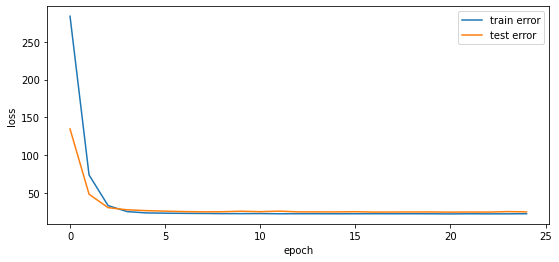

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 4))

plt.xlabel('epoch')
plt.ylabel('loss')

plt.plot(model.history.history['loss'], label='train error')
plt.plot(model.history.history['val_loss'], label='test error')

plt.legend()
plt.show()

## 3.- Ciclo de entrenamiento y pipeline
- Dataset tipo tf.data

In [17]:
x_data = tf.data.Dataset.from_tensor_slices(X_train_norm)
y_data = tf.data.Dataset.from_tensor_slices(y_train)

In [18]:
dataset = tf.data.Dataset.zip((x_data, y_data))
dataset = dataset.shuffle(len(dataset)).batch(1)
test_batch = next(iter(dataset))
test_batch

(<tf.Tensor: shape=(1, 13), dtype=float64, numpy=
 array([[-0.39193867,  0.03681264, -0.73484823, -0.26194048, -1.2480902 ,
         -0.55350756, -1.25984515,  1.25727974, -0.63456952, -0.38354484,
          0.21453246,  0.43726215, -0.55636593]])>,
 <tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[20.9]])>)

- Definir train_step

In [19]:
loss_fn = tf.keras.losses.MeanSquaredError()

@tf.function
def train_step(batch, model, optimizer):
    x, y = batch

    with tf.GradientTape() as tape:
        output = model(x, training=True)  # Logits for this minibatch
        #print(output)
        # Compute the loss value for this minibatch.
        loss_value = loss_fn(y, output)

    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return loss_value


- Entrenamiento

In [20]:
model = tf.keras.Sequential([
    Linear(1)
])

optimizer = tf.keras.optimizers.SGD(0.001)

In [21]:
epochs = 25
loss_epoch = []

for epoch in range(epochs):
    loss = 0.0
    for batch in dataset:
        loss += train_step(batch, model, optimizer)
    total_loss = loss / len(dataset)
    print(total_loss)
    loss_epoch.append(total_loss.numpy())

tf.Tensor(261.08722, shape=(), dtype=float32)
tf.Tensor(68.57671, shape=(), dtype=float32)
tf.Tensor(32.380314, shape=(), dtype=float32)
tf.Tensor(25.276203, shape=(), dtype=float32)
tf.Tensor(23.610294, shape=(), dtype=float32)
tf.Tensor(23.186516, shape=(), dtype=float32)
tf.Tensor(22.87623, shape=(), dtype=float32)
tf.Tensor(22.703459, shape=(), dtype=float32)
tf.Tensor(22.33753, shape=(), dtype=float32)
tf.Tensor(22.63207, shape=(), dtype=float32)
tf.Tensor(22.460749, shape=(), dtype=float32)
tf.Tensor(22.410482, shape=(), dtype=float32)
tf.Tensor(22.461311, shape=(), dtype=float32)
tf.Tensor(22.363018, shape=(), dtype=float32)
tf.Tensor(22.237865, shape=(), dtype=float32)
tf.Tensor(22.384308, shape=(), dtype=float32)
tf.Tensor(22.111807, shape=(), dtype=float32)
tf.Tensor(22.218325, shape=(), dtype=float32)
tf.Tensor(22.276257, shape=(), dtype=float32)
tf.Tensor(22.11819, shape=(), dtype=float32)
tf.Tensor(22.17799, shape=(), dtype=float32)
tf.Tensor(22.026766, shape=(), dtype=flo

## Ejercicio
- Definir función __test_step()__ para evaluación
- Tomar tiempo de entrenamiento por época